### This project aims to develop and optimize predictive models to forecast student dropout rates and recommend interventions to improve retention and student success.`

In [1]:
# data wrangling libraries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_column',38)
              
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# data modeling library
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Statistical analysis libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
# load your data

df = pd.read_csv('students_dropout.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### Understand the data set

In [3]:
# check the row and column will have in the dataset

df.shape

(4424, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

* we have 4424 rows and 37 columns
* There is only one category variable in the data set

#### Understand the Columns
* Marital status: The marital status of the student (e.g., single, married).
* Application mode: The way the student applied to the institution (e.g., through an exam, a transfer, or direct admission).
* Application order: The order or priority in which the student applied for different courses or programs.
* Course: The specific course or program the student is enrolled in.
* Daytime/evening attendance: Whether the student attends classes during the day or in the evening.
* Previous qualification: The type of educational qualification the student had before enrolling in the current program (e.g., high school diploma, associate degree).
* Previous qualification (grade): The grade or score the student received in their previous educational qualification.
* Nacionality: The student's nationality or country of origin.
* Mother's qualification: The highest level of education attained by the student's mother (e.g., high school, bachelor's degree).
* Father's qualification: The highest level of education attained by the student's father.
* Mother's occupation: The type of job or occupation the student's mother holds.
* Father's occupation: The type of job or occupation the student's father holds.
* Admission grade: The grade or score the student received upon admission to the institution.
* Displaced: Whether the student is displaced (e.g., a refugee or from a conflict zone).
* Educational special needs: if the student has any special educational needs (e.g., learning disabilities).
* Debtor: Whether the student has any unpaid tuition fees or financial debts to the institution.
* Tuition fees up to date: Whether the student has fully paid their tuition fees up to the current date.
* Gender: The gender of the student (e.g., male, female).
* Scholarship holder: Indicates if the student is receiving a scholarship.
* Age at enrollment: The age of the student when they first enrolled in the current program.
* International: Indicates if the student is from another country (i.e., an international student).
* Curricular units 1st sem (credited): The number of academic credits the student earned for the first semester based on prior learning.
* Curricular units 1st sem (enrolled): The number of academic units or courses the student is enrolled in during the first semester.
* Curricular units 1st sem (evaluations): The number of evaluations or exams the student has taken in the first semester.
* Curricular units 1st sem (approved): The number of academic units or courses that approved for the student in the first semester.
* Curricular units 1st sem (grade): The grade or score the student received in the first semester.
* Curricular units 1st sem (without evaluations): The number of courses or units in the first semester where the student did not take any evaluations or exams.
* Curricular units 2nd sem (credited): The number of academic credits the student earned for the second semester based on prior learning.
* Curricular units 2nd sem (enrolled): The number of academic units or courses the student is enrolled in during the second semester.
* Curricular units 2nd sem (evaluations): The number of evaluations or exams the student has taken in the second semester.
* Curricular units 2nd sem (approved): The number of academic units or courses that approved for the student in the second semester.
* Curricular units 2nd sem (grade): The grade or score the student received in the second semester.
* Curricular units 2nd sem (without evaluations): The number of courses or units in the second semester where the student did not take any evaluations or exams.
* Unemployment rate: The unemployment rate in the country or region during the time of the student's enrollment.
* Inflation rate: The inflation rate in the country or region during the time of the student's enrollment.
* GDP: The Gross Domestic Product (GDP) growth rate of the country or region during the time of the student's enrollment.
* Target: The outcome or status of the student, indicating whether they graduated, dropped out, or are still enrolled.


##  Data Cleaning
* Rename the incorrect spelling of the column name to the correct spelling
* checking for missing value
* checking for inappropriate data types
* checked for duplicated

In [5]:
df2 = df.copy()

In [6]:
# Rename the incorrect spelling column name to the correct spelling

df2 = df2.rename(columns = {'Daytime/evening attendance\t':'Daytime/evening attendance',
                            'Nacionality':'Nationality'})

df2 = df2.rename(columns = 
                 {'Curricular units 1st sem (credited)':'Curricular units 1st semester (credited)',
                  'Curricular units 1st sem (enrolled)':'Curricular units 1st semester (enrolled)',
                  'Curricular units 1st sem (evaluations)':'Curricular units 1st semester (evaluations)',
                  'Curricular units 1st sem (approved)':'Curricular units 1st semester (approved)',
                  'Curricular units 1st sem (grade)':'Curricular units 1st semester (grade)',
                  'Curricular units 1st sem (without evaluations)':'Curricular units 1st semester (without evaluations)'})

df2 = df2.rename(columns = 
                 {'Curricular units 2nd sem (credited)':'Curricular units 2nd semester (credited)',
                  'Curricular units 2nd sem (enrolled)':'Curricular units 2nd semester (enrolled)',
                  'Curricular units 2nd sem (evaluations)':'Curricular units 2nd semester (evaluations)',
                  'Curricular units 2nd sem (approved)':'Curricular units 2nd semester (approved)',
                  'Curricular units 2nd sem (grade)':'Curricular units 2nd semester (grade)',
                  'Curricular units 2nd sem (without evaluations)':'Curricular units 2nd semester (without evaluations)'})

In [7]:
# check for missing Values

df2.isnull().sum()

Marital status                                         0
Application mode                                       0
Application order                                      0
Course                                                 0
Daytime/evening attendance                             0
Previous qualification                                 0
Previous qualification (grade)                         0
Nationality                                            0
Mother's qualification                                 0
Father's qualification                                 0
Mother's occupation                                    0
Father's occupation                                    0
Admission grade                                        0
Displaced                                              0
Educational special needs                              0
Debtor                                                 0
Tuition fees up to date                                0
Gender                         

In [8]:
# check for data types

df2.dtypes

Marital status                                           int64
Application mode                                         int64
Application order                                        int64
Course                                                   int64
Daytime/evening attendance                               int64
Previous qualification                                   int64
Previous qualification (grade)                         float64
Nationality                                              int64
Mother's qualification                                   int64
Father's qualification                                   int64
Mother's occupation                                      int64
Father's occupation                                      int64
Admission grade                                        float64
Displaced                                                int64
Educational special needs                                int64
Debtor                                                 

In [9]:
# check for duplicate

df2.duplicated().sum()

0

* There are no missing values
* There are no inappropriate Data types
* There are no Duplicate

## Data Transformation
* Encode categorical variables using Label Encoder
* Normalize numerical features using StandardScaler

In [10]:
df3 = df2.copy()

In [11]:
# Encode categorical variables

cat_cols = ['Target']
encoder = LabelEncoder()
for cols in cat_cols:
    df3[f'{cols}_nums'] = encoder.fit_transform(df3[cols])

In [12]:
# drop the Target Column

df3 = df3.drop(columns = cat_cols)

In [13]:
df3.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st semester (credited),Curricular units 1st semester (enrolled),Curricular units 1st semester (evaluations),Curricular units 1st semester (approved),Curricular units 1st semester (grade),Curricular units 1st semester (without evaluations),Curricular units 2nd semester (credited),Curricular units 2nd semester (enrolled),Curricular units 2nd semester (evaluations),Curricular units 2nd semester (approved),Curricular units 2nd semester (grade),Curricular units 2nd semester (without evaluations),Unemployment rate,Inflation rate,GDP,Target_nums
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [14]:
df4 = df3.copy()

In [15]:
# Normalize numerical features

scale = StandardScaler()
scale_df = scale.fit_transform(df4)
df4 = pd.DataFrame(data = scale_df, columns= df4.columns)

In [16]:
df4.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st semester (credited),Curricular units 1st semester (enrolled),Curricular units 1st semester (evaluations),Curricular units 1st semester (approved),Curricular units 1st semester (grade),Curricular units 1st semester (without evaluations),Curricular units 2nd semester (credited),Curricular units 2nd semester (enrolled),Curricular units 2nd semester (evaluations),Curricular units 2nd semester (approved),Curricular units 2nd semester (grade),Curricular units 2nd semester (without evaluations),Unemployment rate,Inflation rate,GDP,Target_nums
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,-0.080456,0.022229,0.907512,-0.107993,-0.358167,0.368135,1.357640,-0.574914,-0.430363,-0.159682,-0.300813,-2.528560,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,-0.317984,1.071926,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.159682,-0.300813,-0.109105,-0.550192,0.418050,0.693599,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.925392
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,-0.080456,-0.150419,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.159682,-0.300813,-0.109105,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,-0.225661,-0.317984,-0.509526,0.907512,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,-0.430363,-0.159682,-0.300813,-0.109105,-0.071567,0.418050,0.575611,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0.925392
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,-0.074233,-0.080456,1.002867,-1.101914,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,2.864765,-0.159682,-0.300813,-0.109105,0.167746,0.094832,0.349468,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,0.925392


## Statistical Analysis

In [17]:
df5 = df3.copy()

##### Descriptive statistics
* Perform descriptive statistics on all variables
* checked the count, mean, std, min, and max

##### Note: break the drown the columns into 4

In [18]:
dff1 = df5[["Marital status","Application mode", "Application order",
            "Course","Daytime/evening attendance",
            "Previous qualification","Previous qualification (grade)",
            "Nationality","Mother's qualification","Father's qualification"]]

dff1
        
dff1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000


In [19]:
dff2 = df5[["Mother's occupation","Father's occupation","Admission grade",
            "Displaced","Educational special needs","Debtor",
            "Tuition fees up to date","Gender","Scholarship holder","Age at enrollment"]]
dff2

dff2.describe()

,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145
std,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816
min,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000
50%,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000
75%,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000
max,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000


In [20]:
dff3 = df5[["International","Curricular units 1st semester (credited)",
            "Curricular units 1st semester (enrolled)","Curricular units 1st semester (evaluations)",
            "Curricular units 1st semester (approved)","Curricular units 1st semester (grade)",
            "Curricular units 1st semester (without evaluations)","Curricular units 2nd semester (credited)",
            "Curricular units 2nd semester (enrolled)","Curricular units 2nd semester (evaluations)"]]

dff3

dff3.describe()

,International,Curricular units 1st semester (credited),Curricular units 1st semester (enrolled),Curricular units 1st semester (evaluations),Curricular units 1st semester (approved),Curricular units 1st semester (grade),Curricular units 1st semester (without evaluations),Curricular units 2nd semester (credited),Curricular units 2nd semester (enrolled),Curricular units 2nd semester (evaluations)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291
std,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000
50%,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000
75%,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000
max,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000


In [21]:
dff4 = df5[["Curricular units 2nd semester (approved)","Curricular units 2nd semester (grade)",
            "Curricular units 2nd semester (without evaluations)","Unemployment rate",
            "Inflation rate","GDP","Target_nums"]]

dff4

dff4.describe()

,Curricular units 2nd semester (approved),Curricular units 2nd semester (grade),Curricular units 2nd semester (without evaluations),Unemployment rate,Inflation rate,GDP,Target_nums
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


### Correlation Analysis
* Does the admission grade have a strong relationship with dropout?
* Is there a positive relationship between debtor status and dropout rates?
* Does the grade in previous qualifications impact the likelihood of dropout?
* How does the grade in the 1st semester correlate with dropout rates?
* Is there a relationship between 2nd semester performance and dropout rates?
* Does the age at enrollment Influence the droupout Rate?

In [22]:
df4.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st semester (credited),Curricular units 1st semester (enrolled),Curricular units 1st semester (evaluations),Curricular units 1st semester (approved),Curricular units 1st semester (grade),Curricular units 1st semester (without evaluations),Curricular units 2nd semester (credited),Curricular units 2nd semester (enrolled),Curricular units 2nd semester (evaluations),Curricular units 2nd semester (approved),Curricular units 2nd semester (grade),Curricular units 2nd semester (without evaluations),Unemployment rate,Inflation rate,GDP,Target_nums
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,-0.080456,0.022229,0.907512,-0.107993,-0.358167,0.368135,1.35764,-0.574914,-0.430363,-0.159682,-0.300813,-2.528560,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,-0.317984,1.071926,0.907512,-0.107993,-0.358167,-2.716392,1.35764,-0.574914,-0.562168,-0.159682,-0.300813,-0.109105,-0.550192,0.418050,0.693599,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.925392
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,-0.080456,-0.150419,0.907512,-0.107993,-0.358167,-2.716392,1.35764,-0.574914,-0.562168,-0.159682,-0.300813,-0.109105,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497


In [23]:
df_corr = df4[["Target_nums","Age at enrollment","Previous qualification (grade)",
               "Curricular units 1st semester (grade)",
            "Curricular units 2nd semester (grade)","Debtor","Admission grade"]].corr()
df_corr

,Target_nums,Age at enrollment,Previous qualification (grade),Curricular units 1st semester (grade),Curricular units 2nd semester (grade),Debtor,Admission grade
Target_nums,1.000000,-0.243438,0.103764,0.485207,0.566827,-0.240999,0.120889
Age at enrollment,-0.243438,1.000000,-0.111377,-0.156616,-0.173419,0.098793,-0.029915
Previous qualification (grade),0.103764,-0.111377,1.000000,0.059438,0.053239,-0.037507,0.580444
Curricular units 1st semester (grade),0.485207,-0.156616,0.059438,1.000000,0.837170,-0.104170,0.073868
Curricular units 2nd semester (grade),0.566827,-0.173419,0.053239,0.837170,1.000000,-0.139424,0.074402
Debtor,-0.240999,0.098793,-0.037507,-0.104170,-0.139424,1.000000,-0.014423
Admission grade,0.120889,-0.029915,0.580444,0.073868,0.074402,-0.014423,1.000000


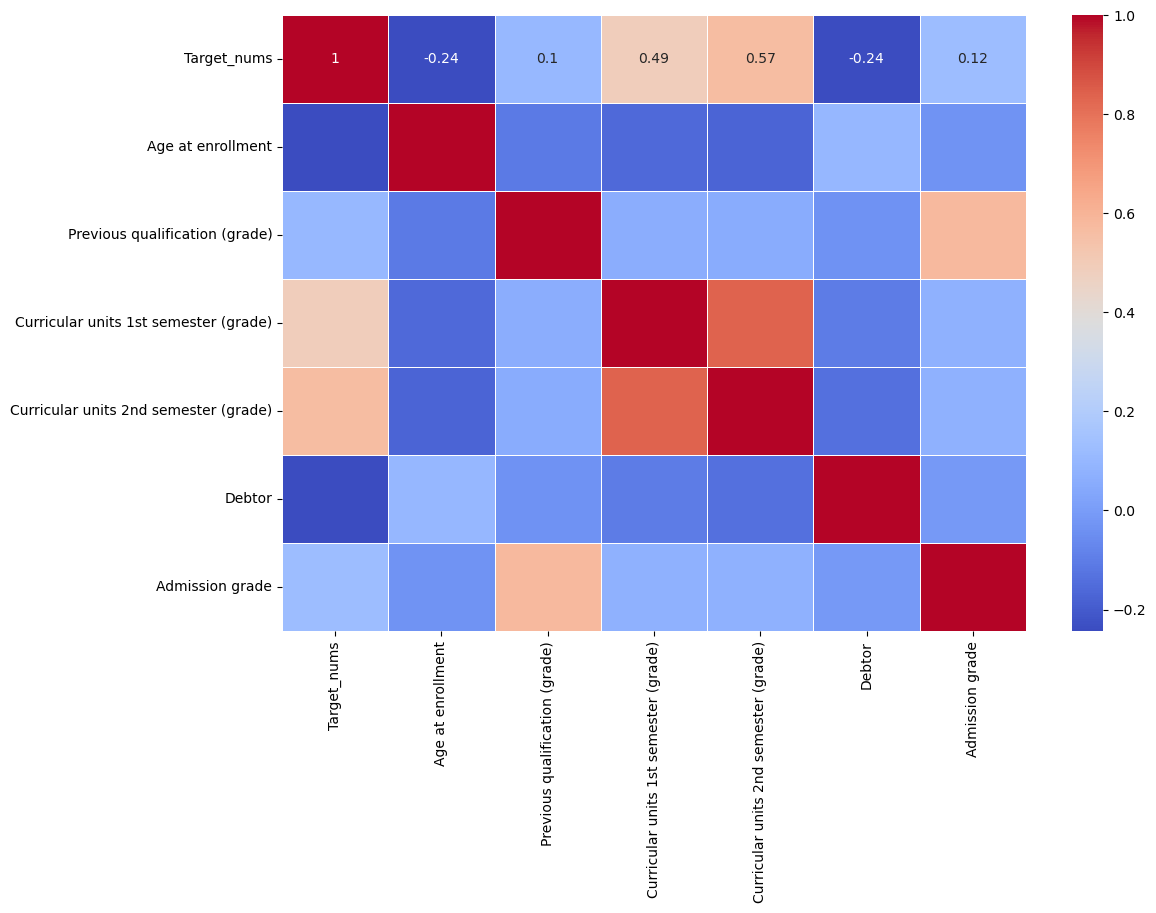

In [24]:
# visulize the correlation on heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot = True, cmap="coolwarm", linewidths=0.5)
plt.show()

### Interpretation
* Age at enrollment: The correlation is -0.24, which indicates a weak negative relationship. This means that as age increases, the likelihood of dropping out slightly decreases.
* Previous qualification grade: The correlation is 0.10, which is a very weak positive relationship. This means that higher grades in previous qualifications have a very small influence on reducing the dropout rate.
* 1st semester grade: The correlation is 0.49, showing a moderate positive relationship. This implies that higher grades in the 1st semester reduce the likelihood of dropping out.
* 2nd semester grade: The correlation is 0.57, which indicates a moderately strong positive relationship. Higher grades in the 2nd semester are linked to a lower likelihood of dropping out.
* Debtor: The correlation is -0.24, suggesting a weak negative relationship. Students with debtor status are slightly more likely to drop out.
* Admission grade: The correlation is 0.12, a weak positive relationship. This means that higher admission grades slightly decrease the likelihood of dropping out

## Hypothesis tests
* Does Admission Grade affect Target student (Dropout, Graduate, Enrolled)?
* Does Curricular Units 1st Semester Grade affect Target student (Dropout, Graduate, Enrolled)?
* Does Curricular Units 2nd Semester Grade affect Target student (Dropout, Graduate, Enrolled)?

In [25]:
df2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st semester (credited),Curricular units 1st semester (enrolled),Curricular units 1st semester (evaluations),Curricular units 1st semester (approved),Curricular units 1st semester (grade),Curricular units 1st semester (without evaluations),Curricular units 2nd semester (credited),Curricular units 2nd semester (enrolled),Curricular units 2nd semester (evaluations),Curricular units 2nd semester (approved),Curricular units 2nd semester (grade),Curricular units 2nd semester (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [26]:
# Rename the column (Admission Grade, Curricular units 1st semester (grade), 
# Curricular units 2nd semester (grade) again)

df2 = df2.rename(columns =
                 {'Admission grade':'Admission_grade',
                  'Curricular units 1st semester (grade)':'Curricular_units_1st_semester_(grade)',
                  'Curricular units 2nd semester (grade)':'Curricular_units_2nd_semester_(grade)'})

In [27]:
# Does Admission Grade Affect Target student (Dropout, Graduate, Enrolled)?

# define your hypothesis
null = ('There is no significant difference in admission grades among'
        'target students who drop out, graduate, or still enrolled')
alternative = ('There is a significant difference in admission grades'
             'among  target students who drop out, graduate, or still enrolled')

# define your alpha level
alpha = 0.05

# decision rule
# if p < alpha: reject null hypothesis else: fail to reject null hypothesis

# calculate the correlation coefficient and get the p-value

Dropout = df2[df2.Target == 'Dropout'].Admission_grade
Graduate = df2[df2.Target == 'Graduate'].Admission_grade
Enrolled = df2[df2.Target == 'Enrolled'].Admission_grade

test_stats, pvalue = stats.f_oneway(Dropout, Graduate, Enrolled)

# conclusion

if pvalue < alpha:
    print(f'{alternative} with pvalue of {pvalue} and conclude that there is a'
    'difference in admission grades among  target students')
else:
    print(f'{null} and conclude that there is no difference in admission grades'
    'among  target students')

There is a significant difference in admission gradesamong  target students who drop out, graduate, or still enrolled with pvalue of 4.380466113389808e-16 and conclude that there is adifference in admission grades among  target students


#### Interpretation
* The p-value from the test is 4.38e-16, which is extremely small.
* There is a significant difference in admission grades between students who drop out, graduate, or are still enrolled.
* This means that students with different admission grades may face varying risks of dropping out or succeeding

In [28]:
# Rename the column (Curricular_units_1st_semester_(grade),Curricular_units_2nd_semester_(grade))

df2 = df2.rename(columns =
                 {'Curricular_units_1st_semester_(grade)':'Curricular_units_1st_semester_grade',
                  'Curricular_units_2nd_semester_(grade)':'Curricular_units_2nd_semester_grade'})

In [29]:
# Does Curricular Units 1st Semester Grade affect Target student (Dropout, Graduate, Enrolled)? 

# define your hypothesis
null = ('There is no significant difference in Curricular_units_1st_semester_grade among'
       'target students who drop out, graduate, or still enrolled')
alternative = ('There is a significant difference in Curricular_units_1st_semester_grade'
              'among  target students who drop out, graduate, or still enrolled')

# define your alpha level
alpha = 0.05

# decision rule
# if p < alpha: reject null hypothesis else: fail to reject null hypothesis

# calculate the correlation coefficient and get the p-value

Dropout = df2[df2.Target == 'Dropout'].Curricular_units_1st_semester_grade
Graduate = df2[df2.Target == 'Graduate'].Curricular_units_1st_semester_grade
Enrolled = df2[df2.Target == 'Enrolled'].Curricular_units_1st_semester_grade

test_stats, pvalue = stats.f_oneway(Dropout, Graduate, Enrolled)

# conclusion

if pvalue < alpha:
    print(f'{alternative} with pvalue of {pvalue} and conclude that there is a difference'
    'in Curricular_units_1st_semester_grade among  target students')
else:
    print(f'{null} and conclude that there is no difference in'
    'Curricular_units_1st_semester_grade among  target students')

There is a significant difference in Curricular_units_1st_semester_gradeamong  target students who drop out, graduate, or still enrolled with pvalue of 2.8030516932425653e-269 and conclude that there is a differencein Curricular_units_1st_semester_grade among  target students


#### Interpretation
* The p-value is 2.80e-269, which is an extremely small value.
* This indicates that there is a statistically significant difference in the first-semester grades between students who dropped out, graduated, or still enrolled.
*  This means that low performance in the first semester could be a strong early warning sign of potential dropout

In [30]:
# Does Curricular Units 2nd Semester Grade affect Target student (Dropout, Graduate, Enrolled)?

# define your hypothesis
null = ('There is no significant difference in Curricular_units_2nd_semester_grade among'
       'target students who drop out, graduate, or still enrolled')
alternative = ('There is a significant difference in Curricular_units_2nd_semester_grade among'
        'target students who drop out, graduate, or still enrolled')

# define your alpha level
alpha = 0.05

# decision rule
# if p < alpha: reject null hypothesis else: fail to reject null hypothesis

# calculate the correlation coefficient and get the p-value

Dropout = df2[df2.Target == 'Dropout'].Curricular_units_2nd_semester_grade
Graduate = df2[df2.Target == 'Graduate'].Curricular_units_2nd_semester_grade
Enrolled = df2[df2.Target == 'Enrolled'].Curricular_units_2nd_semester_grade

test_stats, pvalue = stats.f_oneway(Dropout, Graduate, Enrolled)

# conclusion

if pvalue < alpha:
    print(f'{alternative} with pvalue of {pvalue} and conclude that there is a difference' 
    'in Curricular_units_2nd_semester_grade among  target students')
else:
    print(f'{null} and conclude that there is no difference in '
    'Curricular_units_2nd_semester_grade among target students')

There is a significant difference in Curricular_units_2nd_semester_grade amongtarget students who drop out, graduate, or still enrolled with pvalue of 0.0 and conclude that there is a differencein Curricular_units_2nd_semester_grade among  target students


#### Interpretation
* The p-value is 0.0, is less than the alpha level of 0.05.
* This indicates that there is a statistically significant difference in the 2nd semester grades among students who dropped out, graduated, or are still enrolled.
* This shows that a student's performance in the 2nd semester can help explain whether they are more likely to graduate, remain enrolled, or drop out.
* Students with lower grades in the second semester may be at higher risk of dropping out

## Genral Insights
* Age at Enrollment has a weak negative correlation between age at enrollment and dropout risk (-0.24), This suggests that older students are slightly less likely to drop out compared to younger students. While this relationship is weak
* Previous Qualification Grades also has a very weak positive correlation (0.10) between previous qualification grades and dropout risk implies that while higher previous grades slightly reduce the likelihood of dropping out
*First Semester Grades has a moderate positive correlation (0.49) indicates that students who perform well in their first semester are less likely to drop out. This finding is reinforced by the ANOVA test, which shows a highly significant difference in first-semester grades among students who drop out, graduate, or are still enrolled. Poor first-semester performance appears to be an early indicator of potential dropout.
* Second Semester Grades, The correlation between second-semester grades and dropout risk is stronger (0.57), showing that students who perform well in the second semester are significantly less likely to drop out. The ANOVA test confirms this with an extremely low p-value, showing a statistically significant difference in second-semester grades across the student groups (dropout, graduate, enrolled).
* Debtor Status has a weak negative correlation (-0.24) This indicates that students who owe the institution are slightly more likely to drop out.
* Admission Grades has a weak positive correlation (0.12) between admission grades and dropout This suggests that students with higher admission grades are less likely to drop out. The ANOVA results further show that admission grades differ significantly among students who drop out, graduate, or remain enrolled.

## Students Who Likely to Drop Out
* New student are slightly more likely to drop out
* Students who did not do well in the first semester are much more likely to drop out.
* Students who did not perform well in their second semester are significantly more likely to drop out.
* Students who owe money school are more likely to drop out.

## Interventions to Improve Retention
* Focus on helping students who struggle in their first semester. Offer tutoring, mentoring, or academic workshops to improve their performance before the second semester begins.
* Monitor Student Second Semester Performance and Provide timely academic interventions for those who are at risk of falling behind
* Identify students who are in debt and offer financial counseling, payment plans, or scholarships.
* Support Younger Students and offer mentorship programs to guide them through their first year of studies
* Intervene in students with lower admission grades such as personalized study plans or academic coaching, to boost their chances of staying.